<a href="https://colab.research.google.com/github/MiguelAngel-ht/Triangles-Properties-with-OpenCV/blob/main/first-advance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

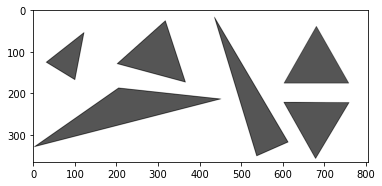

In [146]:
img = cv.imread('Triangulos.PNG', 0)
plt.imshow(img, 'gray')
plt.show()

In [15]:
# Function to scale a image from min to max

def ImScale(img, minf=0, maxf=255):

    x_min = img.min()
    x_max = img.max()

    img_scale = minf + ((img - x_min) / (x_max - x_min)) * (maxf - minf)
    img_scale = img_scale.astype('uint8')

    return img_scale

In [192]:
ret, img_bin = cv.threshold(img, 240, 255, cv.THRESH_BINARY_INV)

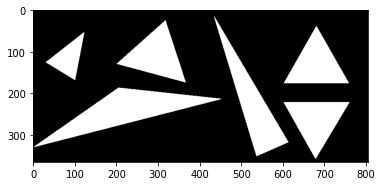

In [193]:
plt.imshow(img_bin, 'gray')
plt.show()

In [194]:
num, y_img, stats, centroids = cv.connectedComponentsWithStats(
	img_bin, cv.CV_32S)

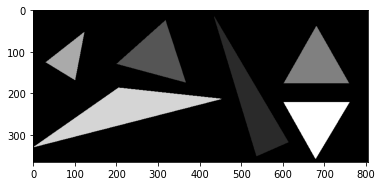

In [195]:
plt.imshow(y_img, 'gray')
plt.show()

In [196]:
for i in range(num):
  print('\tTriángulo ',i, '\t Área ',stats[i][4],'\tCentroide ', centroids[i])

	Triángulo  0 	 Área  220173 	Centroide  [395.34539203 176.90043738]
	Triángulo  1 	 Área  14933 	Centroide  [527.67434541 226.14163263]
	Triángulo  2 	 Área  11439 	Centroide  [295.01774631 108.79954541]
	Triángulo  3 	 Área  10900 	Centroide  [680.5        129.40330275]
	Triángulo  4 	 Área  4630 	Centroide  [ 84.61965443 114.92764579]
	Triángulo  5 	 Área  20812 	Centroide  [219.61459735 242.70766865]
	Triángulo  6 	 Área  10938 	Centroide  [680.10074968 266.23477784]


In [377]:
bordes = cv.Canny(img_bin, 0, 255, 5)

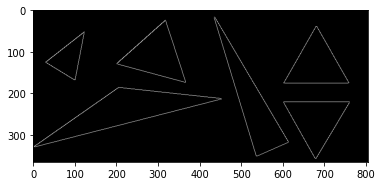

In [308]:
plt.imshow(bordes, 'gray')
plt.show()

In [309]:
lines = cv.HoughLines(bordes, 1, np.pi/180, 71)

In [316]:
rhos = []; thetas = []
for i in lines:
  thetas.append(i[0][1])


In [320]:
thetas = np.copy(thetas)
thetas = thetas[np.r_[True, np.abs(np.diff(thetas))>=0.5]]
len(thetas)

18

In [321]:
for i in thetas:
  if np.any(lines[:, 0] == i):
    j = np.where(lines==i)[0][0]
    rhos.append(lines[j][0][0])

In [322]:
colors = np.linspace(50,255,len(rhos))

In [323]:
for rho, theta, color in zip(rhos, thetas, colors):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(bordes,(x1,y1),(x2,y2),(color,0,0),1)

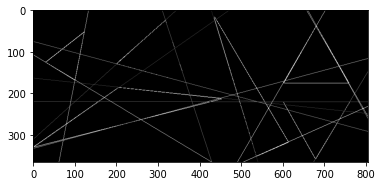

In [324]:
plt.imshow(bordes, 'gray')
plt.show()

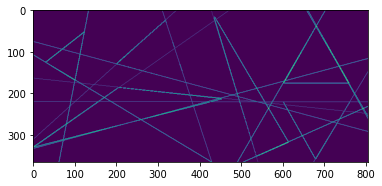

In [325]:
plt.imshow(bordes)
plt.show()

In [326]:
for i in lines:
  print('\tRho: ', i[0][0], '\tTheta: ', i[0][1])

	Rho:  -410.0 	Theta:  2.8448865
	Rho:  163.0 	Theta:  1.6755161
	Rho:  318.0 	Theta:  1.3264502
	Rho:  220.0 	Theta:  1.5707964
	Rho:  270.0 	Theta:  0.9599311
	Rho:  175.0 	Theta:  1.5707964
	Rho:  230.0 	Theta:  0.83775806
	Rho:  -295.0 	Theta:  2.8274333
	Rho:  -365.0 	Theta:  2.6005406
	Rho:  766.0 	Theta:  0.54105204
	Rho:  -570.0 	Theta:  2.6179938
	Rho:  73.0 	Theta:  1.8325957
	Rho:  -371.0 	Theta:  2.6179938
	Rho:  608.0 	Theta:  0.5235988
	Rho:  321.0 	Theta:  1.3089969
	Rho:  117.0 	Theta:  0.9075712
	Rho:  227.0 	Theta:  0.8552113
	Rho:  -578.0 	Theta:  2.6354473
	Rho:  -419.0 	Theta:  2.6354473
	Rho:  131.0 	Theta:  0.19198622
	Rho:  612.0 	Theta:  0.5061455
	Rho:  -410.0 	Theta:  2.6179938
	Rho:  92.0 	Theta:  2.1118484
	Rho:  157.0 	Theta:  1.6929693
	Rho:  768.0 	Theta:  0.5235988
	Rho:  539.0 	Theta:  1.1519173


In [327]:
from skimage import measure

In [328]:
labels = measure.label(img_bin, connectivity=1)
props = measure.regionprops(labels)

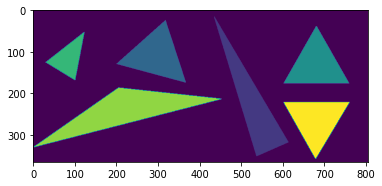

In [331]:
plt.imshow(labels)
plt.show()

In [335]:
for prop in props:
  print(prop.area, prop.centroid, prop.eccentricity)

14933 (226.14163262572825, 527.6743454094958) 0.9783147389446369
11439 (108.79954541480899, 295.0177463064953) 0.47214371499105057
10900 (129.40330275229357, 680.5) 0.15969478814749355
4630 (114.92764578833693, 84.61965442764578) 0.7621250093081351
20812 (242.70766865270036, 219.61459734768403) 0.9763033620465627
10938 (266.2347778387274, 680.1007496800146) 0.18911294444059082


In [375]:
import imutils

In [390]:
# FINDING VERTICES
cnts = cv.findContours(bordes, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
vertices = []

for c in cnts:
    # approximate the contour
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.02 * peri, True)
    # if our approximated contour has 3
    if len(approx) == 3:
        vertices.append(approx)
        break

In [391]:
vertices[0]

array([[[121,  54]],

       [[100, 167]],

       [[ 30, 125]]], dtype=int32)

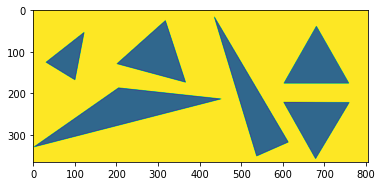

In [389]:
plt.imshow(img)
plt.show()